<h2 style='text-align:center; margin-bottom :10px'>About Project</h2>

This project is carried out using the Covid19 API, a recapitulation of global COVID-19 data from the website https://covid19-api.org/. The goal is to see a brief overview of the current conditions of the spread of Covid-19 cases throughout the world and ASEAN, especially in Indonesia.

In [132]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import json
import requests
import datetime
import collections

In [133]:
#function get data json
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code  == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

To get the covid19 dataframe, use the pd.io.json.json_normalize function and call the previously created function, which is get_json ().<br>
retrieve the latest Covid19 API data from all countries using the datetime.date.today function


In [134]:
covid_url = 'https://covid19-api.org/api/status?date='+str(datetime.date.today())
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
df_covid_worldwide.head()

C:\Users\yogi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,country,last_update,cases,deaths,recovered
0,US,2020-09-28T15:23:53,7118523,204790,2766280
1,IN,2020-09-28T15:23:53,6074702,95542,5016520
2,BR,2020-09-28T15:23:53,4732309,141741,4172711
3,RU,2020-09-28T15:23:53,1154299,20299,942619
4,CO,2020-09-28T15:23:53,813056,25488,711472


In [135]:
total_covid_url = 'https://covid19-api.org/api/timeline'
total_covid = pd.io.json.json_normalize(get_json(total_covid_url))
total_cases = total_covid['total_cases'][1]
total_deaths = total_covid['total_deaths'][1]

C:\Users\yogi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [136]:
#get data country
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country', 'alpha3':'country_code'})[['name','country', 'latitude', 'longitude','country_code']]

df_countries.head()

C:\Users\yogi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,country,latitude,longitude,country_code
0,Afghanistan,AF,33.0,65.0,AFG
1,Albania,AL,41.0,20.0,ALB
2,Algeria,DZ,28.0,3.0,DZA
3,Andorra,AD,42.5,1.5,AND
4,Angola,AO,-12.5,18.5,AGO


In [137]:
#merge two dataframe
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name,latitude,longitude,country_code
0,US,2020-09-28T15:23:53,7118523,204790,2766280,United States of America,38.0,-97.0,USA
1,IN,2020-09-28T15:23:53,6074702,95542,5016520,India,20.0,77.0,IND
2,BR,2020-09-28T15:23:53,4732309,141741,4172711,Brazil,-10.0,-55.0,BRA
3,RU,2020-09-28T15:23:53,1154299,20299,942619,Russian Federation,60.0,100.0,RUS
4,CO,2020-09-28T15:23:53,813056,25488,711472,Colombia,4.0,-72.0,COL


Visalization of 10 countries with the highest covid-19 cases in the world

In [138]:
#10 TOP most cases covid19
df_top_cases_countries = df_covid_denormalized.sort_values(by='cases', ascending=False).reset_index()
df_top_10_cases_countries = df_top_cases_countries.head(10).append(df_top_cases_countries[df_top_cases_countries['country']=='ID'])
df_top_10_cases_countries

,index,country,last_update,cases,deaths,recovered,name,latitude,longitude,country_code
0,0,US,2020-09-28T15:23:53,7118523,204790,2766280,United States of America,38.0,-97.0,USA
1,1,IN,2020-09-28T15:23:53,6074702,95542,5016520,India,20.0,77.0,IND
2,2,BR,2020-09-28T15:23:53,4732309,141741,4172711,Brazil,-10.0,-55.0,BRA
3,3,RU,2020-09-28T15:23:53,1154299,20299,942619,Russian Federation,60.0,100.0,RUS
4,4,CO,2020-09-28T15:23:53,813056,25488,711472,Colombia,4.0,-72.0,COL
5,5,PE,2020-09-28T15:23:53,805302,32262,664490,Peru,-10.0,-76.0,PER
6,6,MX,2020-09-28T15:23:53,730317,76430,616696,Mexico,23.0,-102.0,MEX
7,7,ES,2020-09-28T15:23:53,716481,31232,150376,Spain,40.0,-4.0,ESP
8,8,AR,2020-09-28T15:23:53,711325,15749,565935,Argentina,-34.0,-64.0,ARG
9,9,ZA,2020-09-28T15:23:53,670766,16398,603721,South Africa,-29.0,24.0,ZAF


In [139]:
#get data json for geo
country_geo_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
df_geo = pd.io.json.json_normalize(get_json(country_geo_url))
df_geo = list(list(df_geo['features'])[0])

C:\Users\yogi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [140]:
df_geo_top_cases = []
for country in df_geo:
    if  country['properties']['name'] == 'Russia':
        country['properties']['name'] = 'Russian Federation'
    if country['properties']['name'] in list(df_top_10_cases_countries['name']):
        df_geo_top_cases.append(country)
geo_data = {"type":"FeatureCollection","features":df_geo_top_cases}

In [141]:
#create grafik map
last_time_update = str(datetime.date.today()-datetime.timedelta(1))
world = folium.Map( location=[0,0],zoom_start=2)
choropleth = folium.Choropleth(geo_data=geo_data, data=df_top_10_cases_countries,
             columns=['country_code','cases'],
             key_on='feature.id',
             fill_color='YlGn',
             fill_opacity=0.7,
             line_opacity=0.2,
             legend_name="Cases").add_to(world)

for i in range(len(df_top_10_cases_countries)):  
    data = df_top_10_cases_countries.iloc[i]
    label_country = """<div style='text-align:center;'>
                    <p style='margin-bottom:-20px;font-size:8pt;font-weight:bold;color:balck;'>{}. {} </p><br>
                    <span style='font-size:8pt;background:White;padding:1px'>{:,}</span>
                    </div>""".format(data['index']+1, data['name'], data['cases'])
    choropleth.geojson.add_child(
    folium.Marker(
            [data['latitude'], data['longitude']],
            icon=folium.DivIcon(html =label_country ,icon_size=(200,36),icon_anchor=(80,0)
        )
            )
        )
label_total_value = """
<div style='background:white; text-align:center; padding:-10px;border-radius:5px'>
<h3 style='margin:-10px;color:DarkCyan'>Total Cases</h3>
<h4 style=' margin-bottom:0px'>{:,}</h4>
<p style='color:maroon';>Deaths  {:,} </p>
</div>
<p style='opacity:.7; margin-top:-10px; font-size:8pt'>last updated | {}</p>
""".format(total_cases, total_deaths, last_time_update)
choropleth.geojson.add_child(

    folium.Marker(
            [-50, -130],
            icon=folium.DivIcon(html =label_total_value,icon_size=(136,36)
        )
            )
        )
world.save('top_10_cases_cvodi19.html')
world

Visualization of a Country with the Highest Fatality Rate

In [142]:
df_covid_denormalized['fatality_ratio(%)'] = round((df_covid_denormalized['deaths']/df_covid_denormalized['cases'])*100, 2)
df_covid_denormalized = df_covid_denormalized.replace(['United Kingdom of Great Britain and Northern Ireland'], 'United Kingdom')
#negara dengan fatality ratio tertinggi (10)
columns = ['country','last_update','name', 'cases', 'deaths', 'recovered', 'fatality_ratio(%)']
df_top_10_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio(%)', ascending=False)[columns].head(10)
df_top_10_fatality_rate

,country,last_update,name,cases,deaths,recovered,fatality_ratio(%)
145,YE,2020-09-28T15:23:53,Yemen,2030,587,1266,28.92
19,IT,2020-09-28T15:23:53,Italy,309870,35835,224417,11.56
6,MX,2020-09-28T15:23:53,Mexico,730317,76430,616696,10.47
191,EH,2020-09-28T15:23:53,Western Sahara,10,1,8,10.00
13,GB,2020-09-28T15:23:53,United Kingdom,437520,42077,2339,9.62
32,BE,2020-09-28T15:23:53,Belgium,114179,9980,19275,8.74
26,EC,2020-09-28T15:23:53,Ecuador,134747,11279,112296,8.37
157,TD,2020-09-28T15:23:53,Chad,1178,84,1005,7.13
40,SE,2020-09-28T15:23:53,Sweden,90923,5880,0,6.47
181,FJ,2020-09-28T15:23:53,Fiji,32,2,28,6.25


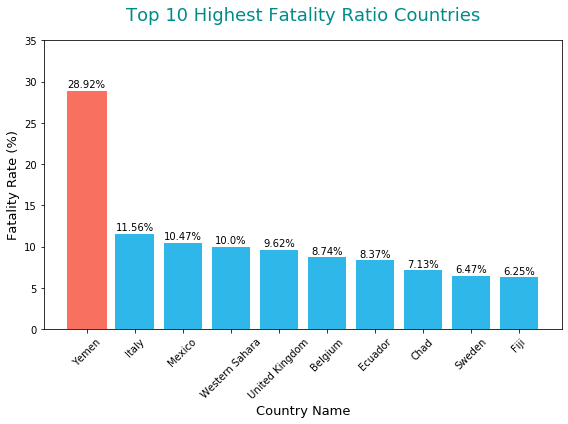

In [143]:
plt.figure(figsize=(8, 6))
x = df_top_10_fatality_rate['name']
y = df_top_10_fatality_rate['fatality_ratio(%)']
bar = plt.bar(x,y, color='#30B7EA')
bar[0].set_color('#f87060')
plt.xlabel('Country Name', fontsize=13)
plt.ylabel('Fatality Rate (%)', fontsize=13)
plt.title('Top 10 Highest Fatality Ratio Countries', color='DarkCyan', fontsize=18, pad=20)
plt.xticks(rotation=45)
plt.ylim(0, 35)
plt.tight_layout()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar)
plt.savefig('top10 Highest fatality rate.png', bbox_inches='tight')
plt.show()

Analysis of Covid-19 in ASEAN

Comparing Covid19 cases in Indonesia (ID) with neighboring countries, namely:
- MY -> Malaysia,
- SG -> Singapure,
- TH -> Thailand,
- VN -> Vietnam, 
- Ph -> Philippines,
- MM -> Myanmar,
- BN -> Brunei Darusalam,
- LA -> Laos.
<br>To that end, country fire is called for as many times as the countries we are going to compare.

In [144]:
# function new cases
def get_new_value(df_covid_timeline, value_name):
    new_value = []
    for i in (range(len(df_covid_timeline))):
        if i == len(df_covid_timeline)-1:
            new_value.append(df_covid_timeline.iloc[i][value_name])
        else:
            new= int(df_covid_timeline.iloc[i][value_name] - df_covid_timeline.iloc[i+1][value_name])
            new_value.append(new)
    return new_value

In [145]:
countries = ['ID','MY','SG','TH','VN','PH', 'MM', 'BN','LA']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))  
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    df_covid_timeline['new_cases'] = get_new_value(df_covid_timeline, 'cases')
    df_covid_timeline['new_deaths'] = get_new_value(df_covid_timeline, 'deaths')
    df_covid_timeline['new_recovered'] = get_new_value(df_covid_timeline, 'recovered')
    df_covid_timeline = df_covid_timeline[df_covid_timeline['last_update'] < datetime.date.today()]
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i=i+1
    
df_covid_timeline_merged.head()

C:\Users\yogi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered
0,LA,2020-09-28,23,0,22,0,0,0
1,LA,2020-09-27,23,0,22,0,0,0
2,LA,2020-09-26,23,0,22,0,0,0
3,LA,2020-09-25,23,0,22,0,0,0
4,LA,2020-09-24,23,0,22,0,0,0


In [146]:
#merge dataframe df_covid_timeline_merged dengan df_countries
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
df_covid_timeline_denormalized.tail()

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,latitude,longitude,country_code
1919,ID,2020-03-10,27,0,2,8,0,2,Indonesia,-5.0,120.0,IDN
1920,ID,2020-03-09,19,0,0,13,0,0,Indonesia,-5.0,120.0,IDN
1921,ID,2020-03-08,6,0,0,2,0,0,Indonesia,-5.0,120.0,IDN
1922,ID,2020-03-06,4,0,0,2,0,0,Indonesia,-5.0,120.0,IDN
1923,ID,2020-03-02,2,0,0,2,0,0,Indonesia,-5.0,120.0,IDN


In [147]:
df_covid_timeline_denormalized = df_covid_timeline_denormalized.replace(["Lao People's Democratic Republic"], 'Laos')

<Figure size 432x288 with 0 Axes>

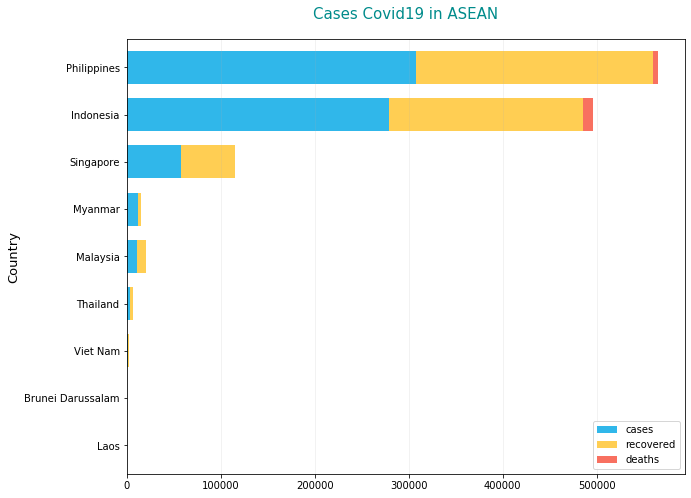

In [148]:
#create bar chart
last_update = datetime.date.today()-datetime.timedelta(1)
plt.clf()
df_covid_update_cases = df_covid_timeline_denormalized[df_covid_timeline_denormalized['last_update'] == last_update].sort_values(by='cases', ascending=True)[['name', 'cases','recovered', 'deaths']]
ax = df_covid_update_cases.plot.barh(x='name', stacked=True, align='center',width=.7, color=['#30B7EA','#FFCE53', '#f87060']);

ax.figure.set_size_inches(10,8)
ax.set_title("Cases Covid19 in ASEAN", color='DarkCyan', fontsize=15, pad= 20)

    
plt.ylabel('Country', fontsize=13)
ax.legend(loc='lower right')
plt.grid(axis='x', alpha=0.2)
plt.savefig('Cases Covid19 in ASEAN.png', bbox_inches='tight')
plt.show()

In [149]:
df_covid_denormalized = df_covid_denormalized.replace(["Lao People's Democratic Republic"], 'Laos')

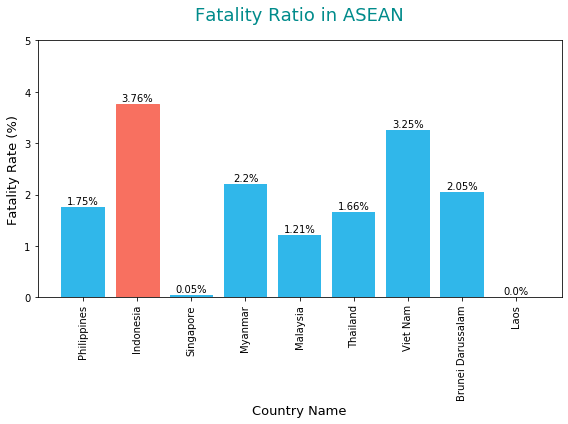

In [150]:
plt.figure(figsize=(8,6))
country_data = df_covid_denormalized['country'].isin(countries)
x = df_covid_denormalized[country_data]['name']
y = df_covid_denormalized[country_data]['fatality_ratio(%)']
bar = plt.bar(x,y, color='#30B7EA')
bar[1].set_color('#f87060')
plt.xlabel('Country Name', fontsize=13)
plt.ylabel('Fatality Rate (%)', fontsize=13)
plt.title('Fatality Ratio in ASEAN', color='DarkCyan', fontsize=18, pad=20)
plt.xticks(rotation=90)
plt.ylim(0,5)
plt.tight_layout()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar)
plt.savefig('fatality rate in ASEAN.png', bbox_inches='tight')
plt.show()

Visualization of the highest daily Covid-19 cases in 5 ASEAN countries

In [151]:
#5 Asean countries with the most casus
last_update = datetime.date.today() - datetime.timedelta(1)
top5_countries = df_covid_timeline_denormalized[df_covid_timeline_merged['last_update'] == last_update].sort_values(by='cases', ascending=False).head(5)['name']
top5_covid_timeline_merged = df_covid_timeline_denormalized[df_covid_timeline_denormalized['name'].isin(top5_countries) ].sort_values(by=['last_update','cases'], ascending=False)
top5_covid_timeline_merged.head()

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,latitude,longitude,country_code
578,PH,2020-09-28,307288,5381,252665,3062,37,155,Philippines,13.000000,122.0,PHL
1718,ID,2020-09-28,278722,10473,206870,3509,87,3856,Indonesia,-5.000000,120.0,IDN
1246,SG,2020-09-28,57715,27,57367,15,0,0,Singapore,1.366667,103.8,SGP
392,MM,2020-09-28,11631,256,3073,897,30,211,Myanmar,22.000000,98.0,MMR
1486,MY,2020-09-28,11034,134,9889,115,0,54,Malaysia,2.500000,112.5,MYS


In [152]:
#take the last 3 months of data
last_90_days = datetime.date.today() - datetime.timedelta(90)
df_covid_timeline_denormalized_90days = top5_covid_timeline_merged[(top5_covid_timeline_merged['last_update'] >= last_90_days)]
df_covid_timeline_denormalized_90days.head()

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,latitude,longitude,country_code
578,PH,2020-09-28,307288,5381,252665,3062,37,155,Philippines,13.000000,122.0,PHL
1718,ID,2020-09-28,278722,10473,206870,3509,87,3856,Indonesia,-5.000000,120.0,IDN
1246,SG,2020-09-28,57715,27,57367,15,0,0,Singapore,1.366667,103.8,SGP
392,MM,2020-09-28,11631,256,3073,897,30,211,Myanmar,22.000000,98.0,MMR
1486,MY,2020-09-28,11034,134,9889,115,0,54,Malaysia,2.500000,112.5,MYS


In [153]:
data_outlier = df_covid_timeline_denormalized_90days[(df_covid_timeline_denormalized_90days['cases'] >= 2000) & ((df_covid_timeline_denormalized_90days['new_cases'] == 0) | (df_covid_timeline_denormalized_90days['new_cases'] >= 12000))]
df_covid_timeline_denormalized_90days.drop(list(data_outlier.index), inplace=True)

C:\Users\yogi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


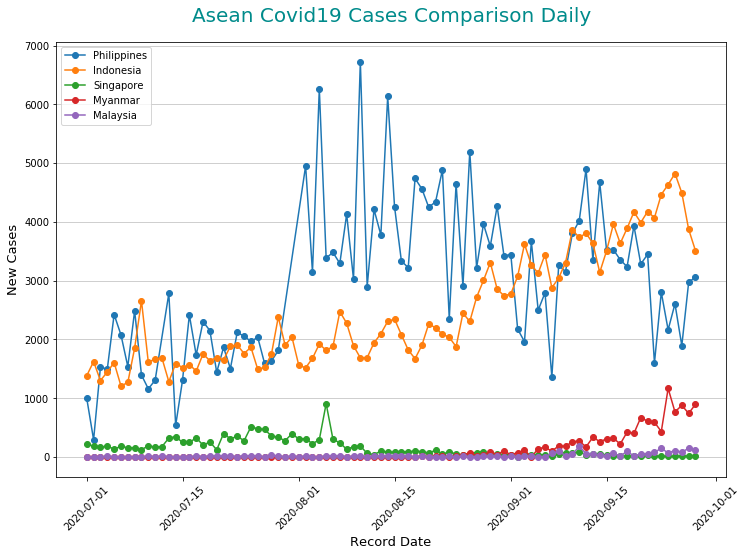

In [154]:
fig, ax = plt.subplots(figsize=(12,8))
for country in top5_countries:
    country_data = df_covid_timeline_denormalized_90days['name']== country
    x = df_covid_timeline_denormalized_90days[country_data]['last_update']
    y = df_covid_timeline_denormalized_90days[country_data]['new_cases']
    ax.plot(x, y, label=country, marker='o')

ax.legend(loc='upper left')
plt.xlabel('Record Date', fontsize=13)
plt.ylabel('New Cases', fontsize=13)
plt.grid(axis='y', alpha=0.75)
plt.title('Asean Covid19 Cases Comparison Daily', color='darkCyan', fontsize=20, pad=20)
plt.xticks(rotation=45)
plt.savefig('Asean Covid19 Cases Comparison Daily.png', bbox_inches='tight')
plt.show()

<h5> Daily analysis which experienced the highest increase in cases in Indonesia </h5>
This analysis was carried out by taking data on days that experienced an increase in the number of cases by more than 50% compared to the previous day.

In [158]:
df_covid_timeline_indo = df_covid_timeline_denormalized[df_covid_timeline_denormalized['country'] == 'ID'].reset_index()
df_covid_timeline_indo.head()

,index,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,latitude,longitude,country_code
0,1718,ID,2020-09-28,278722,10473,206870,3509,87,3856,Indonesia,-5.0,120.0,IDN
1,1719,ID,2020-09-27,275213,10386,203014,3874,78,3611,Indonesia,-5.0,120.0,IDN
2,1720,ID,2020-09-26,271339,10308,199403,4494,90,3207,Indonesia,-5.0,120.0,IDN
3,1721,ID,2020-09-25,266845,10218,196196,4823,113,4343,Indonesia,-5.0,120.0,IDN
4,1722,ID,2020-09-24,262022,10105,191853,4634,128,3895,Indonesia,-5.0,120.0,IDN


In [156]:
list_time = []
for i in range(len(df_covid_timeline_indo)-1):
    if i != 0 and df_covid_timeline_indo.iloc[i+1]['new_cases'] != 0:  
        if df_covid_timeline_indo.iloc[i]['new_cases'] > df_covid_timeline_indo.iloc[i+1]['new_cases']*1.5:
            list_time.append(df_covid_timeline_indo.iloc[i]['last_update'].strftime('%w-%A')) 
data_days =collections.Counter(sorted(list_time)[2:])
data_days

Counter({'2-Tuesday': 5,
         '3-Wednesday': 2,
         '4-Thursday': 2,
         '5-Friday': 1,
         '6-Saturday': 2})

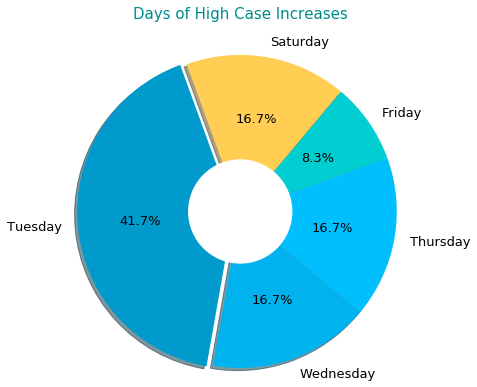

In [157]:
weekdays = []
amount = []
for key, val in data_days.items():
    weekdays.append(key[2:])
    amount.append(val)

x = weekdays
y = amount
colors = [ '#009acd','#00b2ee','#00bfff','#00ced1','#FFCE53']
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(y, labels=x, autopct='%.1f%%', explode = (.05, .0, 0, 0, 0), startangle=110, colors=colors, shadow=True, radius=1.2,textprops=dict(size=13))
fig.gca().add_artist(centre_circle)
ax.set_aspect('equal')
ax.set_title("Days of High Case Increases", pad=30, size=15, color='DarkCyan')
plt.savefig('Days of High Case Increases.png', bbox_inches='tight')
plt.show()

<h5>Comparative analysis of the number of deaths and the number of cured in Indonesia </h5>

In [159]:
last_90_days = datetime.date.today() - datetime.timedelta(90)
df_covid_timeline_last_90days = df_covid_timeline_denormalized[df_covid_timeline_denormalized['last_update']>=last_90_days]

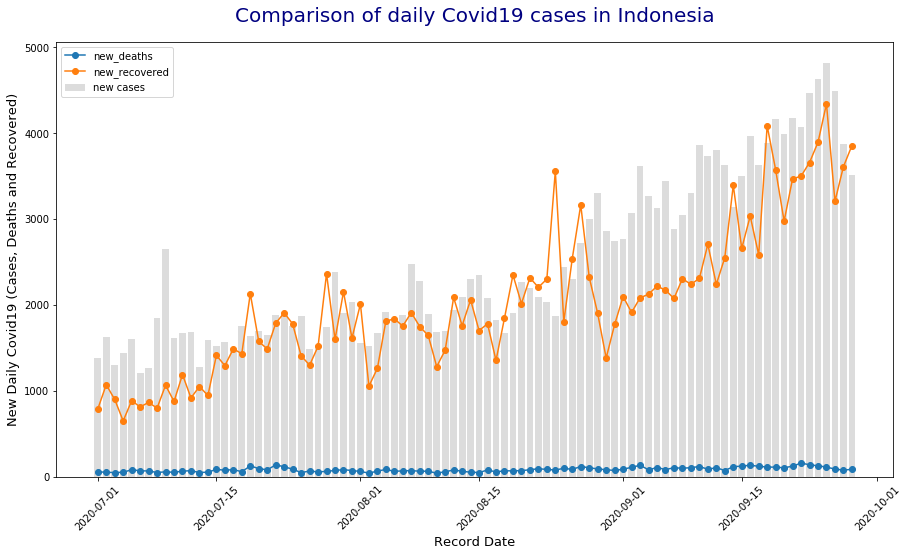

In [160]:
plt.figure(figsize=(15,8))
for cases in ['new_deaths', 'new_recovered']:
    country_data = df_covid_timeline_last_90days['country']== 'ID'
    x = df_covid_timeline_last_90days[country_data]['last_update']
    y = df_covid_timeline_last_90days[country_data][cases]
    line = plt.plot(x, y, label=cases, marker='o')
plt.bar(x, df_covid_timeline_last_90days[country_data]['new_cases'], color='gainsboro', label='new cases')
plt.legend()
plt.xlabel('Record Date', fontsize=13)
plt.ylabel('New Daily Covid19 (Cases, Deaths and Recovered)', fontsize=13)
plt.title('Comparison of daily Covid19 cases in Indonesia', fontsize=20, color='Navy', pad=20)
plt.xticks(rotation=45)
plt.savefig('omparison of daily Covid19 cases in Indonesia.png', bbox_inches='tight')
plt.show()